## Objective

To build my own recommendation system for product on an e-commerce website like Amazon.

Steps:

    *) Exploring the data
    
    *) Simple Poporality based model & Item similarity based recommendations.
           * Popularity based model.
           * Item similarity model.
           * Quatitative comparison between the models.
         
    *) Transfer the datatframe into surprise training and test set.
    
    *) Collobartive Filtering using Suprise package:
    
       -> Item based collabarotive filtering using KNNWith Means.
           * Training the model
           * Evaluating the model
           * Prediction
           * Generating top n recommendation
           * Top 5 item based recommendation
           
       -> User Based collaborative filtering using KNNWith Means.
           * Training the model
           * Evaluating the model
           * Prediction
           * Generating top n recommendation
           * Top 5 item based recommendation
           
    *) SVD Based collaborative filtering: 
           * Training the model
           * Hyperparameter tunning for SVD recommendation system
           * Evaluating the model
           * Generating top n recommendation
           * Top 5 item based recommendation
      
    *) Insights

In [62]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [63]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
import Recommenders as recommender
import Evaluation as evaluater
import time

In [4]:
Electronic_df = pd.read_csv('rating_electronic.csv', names = ['userId','productId','ratings','timestamp'], sep='\,',
                            engine = 'python')

In [5]:
Electronic_df.head()

,userId,productId,ratings,timestamp
0,"""AKM1MP6P0OYPR",0132793040,5.0,"1365811200"""
1,"""A2CX7LUOHB2NDG",0321732944,5.0,"1341100800"""
2,"""A2NWSAGRHCP8N5",0439886341,1.0,"1367193600"""
3,"""A2WNBOD3WNDNKT",0439886341,3.0,"1374451200"""
4,"""A1GI0U4ZRJA8WN",0439886341,1.0,"1334707200"""


In [6]:
Electronic_df.drop('timestamp', axis=1, inplace= True) ## Dropping timestamp column as it is not used in this case

In [7]:
Electronic_df.head()

,userId,productId,ratings
0,"""AKM1MP6P0OYPR",0132793040,5.0
1,"""A2CX7LUOHB2NDG",0321732944,5.0
2,"""A2NWSAGRHCP8N5",0439886341,1.0
3,"""A2WNBOD3WNDNKT",0439886341,3.0
4,"""A1GI0U4ZRJA8WN",0439886341,1.0


In [8]:
Electronic_df.userId.unique()

array(['"AKM1MP6P0OYPR', '"A2CX7LUOHB2NDG', '"A2NWSAGRHCP8N5', ...,
       '"A1H16CBCNEL4G3', '"A2KIYE5RF0OEMY', '"A1G9Q5UJ5Y7DES'],
      dtype=object)

Found there is a " present in all the values of userId column, hence removing it

In [9]:
Electronic_df['userId'] =  Electronic_df['userId'].str.replace('"','')

In [10]:
Electronic_df['userId'].unique()

array(['AKM1MP6P0OYPR', 'A2CX7LUOHB2NDG', 'A2NWSAGRHCP8N5', ...,
       'A1H16CBCNEL4G3', 'A2KIYE5RF0OEMY', 'A1G9Q5UJ5Y7DES'], dtype=object)

In [11]:
Electronic_df.dtypes

userId        object
productId     object
ratings      float64
dtype: object

In [12]:
Electronic_df.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [13]:
Electronic_df.shape

(1048576, 3)

In [14]:
Electronic_df.isnull().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [15]:
Electronic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,1048576.0,3.97338,1.399329,1.0,3.0,5.0,5.0,5.0


###### Keeping the users who has given 50 plus rating 

In [17]:
elect = Electronic_df.groupby(['userId'], sort = False, as_index= False).sum()

In [18]:
elect.shape

(786330, 2)

In [19]:
elect.dtypes

userId      object
ratings    float64
dtype: object

In [20]:
elect= elect.loc[elect['ratings'] >=50]

In [21]:
elect.head(10)

,userId,ratings
118,AT09WGFUM934H,54.0
178,A17HMM1M7T9PJ1,122.0
389,A6J8D9V5S9MBE,70.0
631,A3TAS1AG6FMBQW,80.0
1045,ABU4LUKJU2QOY,70.0
1138,A25RTRAPQAJBDJ,91.0
1310,A3LDPF5FMB782Z,51.0
1322,A1A5KUIIIHFF4U,53.0
1485,A19N3S7CBSU6O7,57.0
1926,A1WKUY7T0EM0GM,64.0


In [22]:
Elect_df = Electronic_df[Electronic_df['userId'].isin(elect['userId'])]

In [23]:
Elect_df.shape

(27819, 3)

In [24]:
Elect_df.head()

,userId,productId,ratings
118,AT09WGFUM934H,0594481813,3.0
178,A17HMM1M7T9PJ1,0970407998,4.0
389,A6J8D9V5S9MBE,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1045,ABU4LUKJU2QOY,0972683275,5.0


In [25]:
Elect_df.loc[Elect_df['userId'] == 'A5JLAU2ARJ0BO']

,userId,productId,ratings
2162,A5JLAU2ARJ0BO,1400532655,1.0
32736,A5JLAU2ARJ0BO,B00003006R,5.0
35087,A5JLAU2ARJ0BO,B00003G1RG,3.0
38345,A5JLAU2ARJ0BO,B00004S9AK,5.0
40411,A5JLAU2ARJ0BO,B00004SB92,4.0
43650,A5JLAU2ARJ0BO,B00004T1KZ,4.0
50803,A5JLAU2ARJ0BO,B00004TS16,5.0
51151,A5JLAU2ARJ0BO,B00004TVSO,2.0
56089,A5JLAU2ARJ0BO,B00004VX3T,3.0
60788,A5JLAU2ARJ0BO,B00004X107,4.0


In [26]:
dup = Elect_df[Elect_df[["userId","productId"]].duplicated() == True]

In [27]:
dup

,userId,productId,ratings


There are no duplicate rows present in the data

In [28]:
users = Elect_df['userId'].unique()

In [29]:
len(users)

1435

In [30]:
product = Elect_df['productId'].unique()

In [31]:
len(product)

13223

 There are 1435 users and 13,223 products.

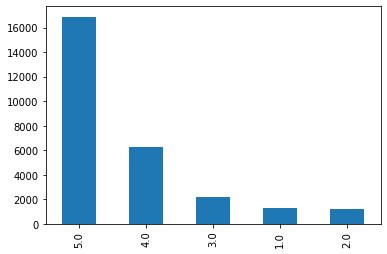

In [32]:
Elect_df.ratings.value_counts().plot(kind='bar')
plt.show()

In [33]:
Elect_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27819 entries, 118 to 1048555
Data columns (total 3 columns):
userId       27819 non-null object
productId    27819 non-null object
ratings      27819 non-null float64
dtypes: float64(1), object(2)
memory usage: 869.3+ KB


In [ ]:
Inference:
    
    1) userId is the unique ID for each customer which is a string value. Total number of users= 1423.
    2) productId is the also a unique id for each product(string). Total number of products= 13,223.
    3) ratings is a ranked categorical variable with the rating scale from 1 to 5.
    4) There are 27819 records with no null values. 
    5) From the bar chart it is evident that users has provided 5 rating for most of the product. 
       2 ratings is least provided rating.
    
    

In [31]:
## Splitting the data

In [34]:
train_data, test_data = train_test_split(Elect_df,test_size= .30, random_state = 0)

## Popularity Model

In [35]:
pop = recommender.popularity_recommender_py()

In [36]:
pop.create(train_data, 'userId','productId')

In [37]:
user_id = users[29]

In [38]:
pop.recommend(user_id)

,userId,productId,score,Rank
2841,A4RASGC2BYMD5,B00007E7JU,58,1.0
930,A4RASGC2BYMD5,B00004ZCJE,46,2.0
5885,A4RASGC2BYMD5,B0002L5R78,42,3.0
4216,A4RASGC2BYMD5,B0000BZL1P,40,4.0
2935,A4RASGC2BYMD5,B00007KDVI,35,5.0
10164,A4RASGC2BYMD5,B000HPV3RW,34,6.0
3922,A4RASGC2BYMD5,B00009XVCZ,33,7.0
453,A4RASGC2BYMD5,B00004SB92,32,8.0
3568,A4RASGC2BYMD5,B00009R6TA,32,9.0
5577,A4RASGC2BYMD5,B0002CPBWI,31,10.0


In [39]:
user_id = users[150]

In [40]:
pop.recommend(user_id)

,userId,productId,score,Rank
2841,A38QEATH3NODFM,B00007E7JU,58,1.0
930,A38QEATH3NODFM,B00004ZCJE,46,2.0
5885,A38QEATH3NODFM,B0002L5R78,42,3.0
4216,A38QEATH3NODFM,B0000BZL1P,40,4.0
2935,A38QEATH3NODFM,B00007KDVI,35,5.0
10164,A38QEATH3NODFM,B000HPV3RW,34,6.0
3922,A38QEATH3NODFM,B00009XVCZ,33,7.0
453,A38QEATH3NODFM,B00004SB92,32,8.0
3568,A38QEATH3NODFM,B00009R6TA,32,9.0
5577,A38QEATH3NODFM,B0002CPBWI,31,10.0


Popularity based model will recommend the high rated popular products.
However, the drawback is that it will recommend the same products for all the users and 
personilize recommendation is not possible. One thing need to ensure is a product should not be given high rating by one/two users alone.

In [41]:
to_check = pop.recommend(user_id)

In [42]:
elect_pro= Elect_df.groupby(['productId'], sort = False, as_index= False).count()

In [43]:
elect_pro.head()

,productId,userId,ratings
0,0594481813,1,1
1,0970407998,1,1
2,0972683275,4,4
3,1400501466,3,3
4,1400501520,1,1


In [44]:
len(elect_pro)

13223

In [45]:
to_check_valid = elect_pro[elect_pro['productId'].isin(to_check['productId'])]

In [46]:
to_check_valid

,productId,userId,ratings
581,B00004SB92,46,46
1193,B00004ZCJE,70,70
3629,B00007E7JU,77,77
3747,B00007KDVI,56,56
4536,B00009R6TA,45,45
4972,B00009XVCZ,46,46
5349,B0000BZL1P,50,50
7067,B0002CPBWI,43,43
7476,B0002L5R78,66,66
12900,B000HPV3RW,40,40


Ensured that the product was not rated by only one user. UserId column indicates the count of users rated the partcular product

## Item Similarity based  personalized recommender Model

In [47]:
item_sim = recommender.item_similarity_recommender_py()

In [48]:
item_sim.create(train_data, 'userId', 'productId')

#### Making some personalized recommendations

In [49]:
user_id = users[5]

In [50]:
item_sim.recommend(user_id)

No. of unique product for the user: 14
no. of unique product in the training set: 10407


,userId,productId,score,rank
0,A25RTRAPQAJBDJ,B000F8W35M,0.035714,1
1,A25RTRAPQAJBDJ,B00009W3DV,0.035714,2
2,A25RTRAPQAJBDJ,B0000683ED,0.035714,3
3,A25RTRAPQAJBDJ,B0009EQL00,0.035714,4
4,A25RTRAPQAJBDJ,B0009IG3UE,0.035714,5
5,A25RTRAPQAJBDJ,B0009IUZ1M,0.035714,6
6,A25RTRAPQAJBDJ,B0006HVIGC,0.035714,7
7,A25RTRAPQAJBDJ,B000FBS3US,0.035714,8
8,A25RTRAPQAJBDJ,B000CM2Y1E,0.035714,9
9,A25RTRAPQAJBDJ,B000922KLQ,0.035714,10


##### Recommendation for different user

In [51]:
user_id = users[48]

In [52]:
item_sim.recommend(user_id)

No. of unique product for the user: 9
no. of unique product in the training set: 10407


,userId,productId,score,rank
0,A3OBZ4F27KV8NO,B00022KOWU,0.055556,1
1,A3OBZ4F27KV8NO,B000067RE4,0.055556,2
2,A3OBZ4F27KV8NO,B000CR7RW0,0.055556,3
3,A3OBZ4F27KV8NO,B0000AE6B3,0.055556,4
4,A3OBZ4F27KV8NO,B0001AVSLO,0.055556,5
5,A3OBZ4F27KV8NO,B0006M39AK,0.055556,6
6,A3OBZ4F27KV8NO,B0009NX7Z8,0.055556,7
7,A3OBZ4F27KV8NO,B0006U3ACY,0.055556,8
8,A3OBZ4F27KV8NO,B000067S6V,0.055556,9
9,A3OBZ4F27KV8NO,B000CR7RVQ,0.055556,10


In [58]:
user_id = 'A1925WP0C8AGLB'

In [59]:
item_sim.recommend(user_id)

No. of unique product for the user: 9
no. of unique product in the training set: 10407


,userId,productId,score,rank
0,A1925WP0C8AGLB,B000BDDFPI,0.055556,1
1,A1925WP0C8AGLB,B000E8BGCO,0.055556,2
2,A1925WP0C8AGLB,B0009VU7RG,0.055556,3
3,A1925WP0C8AGLB,B000GHXTBO,0.037037,4
4,A1925WP0C8AGLB,B0009IIE4W,0.027778,5
5,A1925WP0C8AGLB,B0001XGQTA,0.022222,6
6,A1925WP0C8AGLB,B000CDLCGG,0.018519,7
7,A1925WP0C8AGLB,B000F0ELOG,0.012346,8
8,A1925WP0C8AGLB,B000FBK3QK,0.003968,9
9,A1925WP0C8AGLB,B00005111T,0.000000,10


We can see the difference in the recommended product for each user.

## Quantitative comparison between the model

In [53]:
start = time.time()

user_sample = 0.01

rec_pre = evaluater.precision_recall_calculator(test_data,train_data, pop,item_sim)

(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = rec_pre.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:1427
Length of user sample:14
Getting recommendations for user:A2BAAKZHSUGCDP
No. of unique product for the user: 9
no. of unique product in the training set: 10407
Getting recommendations for user:A37JNUJSVAJKYN
No. of unique product for the user: 10
no. of unique product in the training set: 10407
Getting recommendations for user:A31ICLWQ9CSHRS
No. of unique product for the user: 23
no. of unique product in the training set: 10407
Getting recommendations for user:AR6APXLK7TJU2
No. of unique product for the user: 12
no. of unique product in the training set: 10407
Getting recommendations for user:A2QZ36LCF7XX0C
No. of unique product for the user: 8
no. of unique product in the training set: 10407
Getting recommendations for user:AIEOH19T22OQC
No. of unique product for the user: 8
no. of unique product in the training set: 10407
Getting recommendations for user:A13V1ZWGVTHU6Y
No. of unique product for the user: 11
no. of unique product in the training s

In [54]:
ism_avg_precision_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.008928571428571428,
 0.008928571428571428,
 0.008928571428571428]

In [55]:
ism_avg_recall_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.008928571428571428,
 0.007936507936507936,
 0.0071428571428571435]

In [56]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

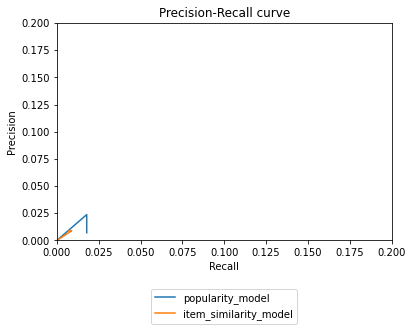

In [57]:
plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

## Collaborative filtering model using Surprise

#### Item Based Model using surprise package - KNNwith Means

In [39]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

In [40]:
reader = Reader(rating_scale=(1,5))

In [41]:
data = Dataset.load_from_df(Elect_df, reader)

In [42]:
type(data)

surprise.dataset.DatasetAutoFolds

In [43]:
trainset, testset = train_test_split(data, test_size= .30, random_state = 123)

In [44]:
user_records = trainset.ur
type(user_records)

collections.defaultdict

In [45]:
user_records[3]

[(3, 4.0),
 (488, 4.0),
 (2408, 5.0),
 (2916, 5.0),
 (3418, 4.0),
 (1155, 5.0),
 (4728, 5.0),
 (6058, 4.0),
 (6881, 5.0),
 (1362, 5.0),
 (7326, 5.0),
 (1934, 4.0),
 (8580, 1.0),
 (5951, 5.0)]

## Training the model using KNNwith Means

In [51]:
from surprise import KNNWithMeans, accuracy 

In [54]:
KNN = KNNWithMeans(k=20, sim_options = {'name':'pearson', 'user_based' : False})

In [55]:
KNN.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [ ]:
## Finding the similar product for the product id = B00007E7JU

In [56]:
similar_prod = KNN.get_neighbors(trainset.to_inner_iid('B00007E7JU'), k=10)

In [57]:
[trainset.to_raw_iid(x) for x in similar_prod]

['B0000CD08M',
 'B00006I53X',
 'B00007GQLU',
 'B000I1YIDQ',
 'B00009XVCZ',
 'B0000A1G05',
 'B00005K47X',
 'B000G3KLPA',
 'B0002YE6FY',
 'B000A3XRSO']

## Evaluating the model

In [58]:
len(testset)

8346

In [59]:
Eval_test= KNN.test(testset)

In [60]:
accuracy.rmse(Eval_test)

RMSE: 1.1722


1.1721978480440285

In [61]:
testset[17]

('A1925WP0C8AGLB', 'B000FDL2Z4', 5.0)

###### Predicting for singe user

In [62]:
KNN.predict(uid = 'A1925WP0C8AGLB', iid = 'B00009XVCZ')

Prediction(uid='A1925WP0C8AGLB', iid='B00009XVCZ', r_ui=None, est=4.575757575757576, details={'actual_k': 0, 'was_impossible': False})

For predicted user id and Item combiation the estimated ratings = 4.57 and the actual K = 0  means the user did not bought this product yet.

## Getting Top n recommendations

In [46]:
testset_alter = trainset.build_anti_testset()

In [64]:
len(testset_alter)

14916007

In [67]:
top_pred = KNN.test(testset_alter[0:100000]) ## taking 100000 records due to memory issue

In [68]:
top_pred[8]

Prediction(uid='A2DUJJEXQP8FOJ', iid='B00005YTWZ', r_ui=4.30524315719201, est=5, details={'actual_k': 0, 'was_impossible': False})

In [70]:
Item_based_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in top_pred])

In [71]:
Item_based_pred_df.columns = ["userId","productId","est_ratings"]

In [72]:
Item_based_pred_df.sort_values(by = ['userId','est_ratings'], ascending = False, inplace = True)

In [73]:
Item_based_pred_df.head(10)

,userId,productId,est_ratings
51951,AXNQ3UXQ3P5HE,B00083LJ5Y,5.0
51958,AXNQ3UXQ3P5HE,B00006IRS3,5.0
51960,AXNQ3UXQ3P5HE,B00005YTWZ,5.0
51961,AXNQ3UXQ3P5HE,B0009A2L9E,5.0
51963,AXNQ3UXQ3P5HE,B000090W8L,5.0
51966,AXNQ3UXQ3P5HE,B000087NBW,5.0
51969,AXNQ3UXQ3P5HE,B0000DC6AZ,5.0
51970,AXNQ3UXQ3P5HE,B0002NUECY,5.0
51976,AXNQ3UXQ3P5HE,B0000300QN,5.0
51977,AXNQ3UXQ3P5HE,B0002GD4P0,5.0


## Top 5 recommendations

In [74]:
Top_5_recommend = Item_based_pred_df.groupby("userId").head(5).reset_index(drop= True)

In [75]:
Top_5_recommend

,userId,productId,est_ratings
0,AXNQ3UXQ3P5HE,B00083LJ5Y,5.0
1,AXNQ3UXQ3P5HE,B00006IRS3,5.0
2,AXNQ3UXQ3P5HE,B00005YTWZ,5.0
3,AXNQ3UXQ3P5HE,B0009A2L9E,5.0
4,AXNQ3UXQ3P5HE,B000090W8L,5.0
5,A8TZ88OM8YOLW,B00083LJ5Y,5.0
6,A8TZ88OM8YOLW,B00006IRS3,5.0
7,A8TZ88OM8YOLW,B00005YTWZ,5.0
8,A8TZ88OM8YOLW,B0009A2L9E,5.0
9,A8TZ88OM8YOLW,B000090W8L,5.0


In [78]:
Top_5_recommend['userId'].unique()

array(['AXNQ3UXQ3P5HE', 'A8TZ88OM8YOLW', 'A33ZYFE8XMKKR1',
       'A2ZR3YTMEEIIZ4', 'A2DUJJEXQP8FOJ', 'A281T8MXBOSWY5',
       'A212MDP6K4VJS5', 'A1KLBWKUQHSQVW', 'A1GFB47CXP4LKR',
       'A16HXVNPU5TCGE'], dtype=object)

Hence the top 5 recommendation has been done using the Item based model. The sample we took has more product compared to user. But, there woudn't be a surprise to the user as the similar product was recommended and we were able to predict the recommendation for only 10 users due to sparsity issue.

## User Based model using surprise - KNNWithMeans

#### Training the model

In [80]:
KNN_user = KNNWithMeans(k=50, sim_options = {'name':'pearson_baseline', 'user_based' : True})

In [81]:
KNN_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [129]:
## Finding the similar user for the user id A281T8MXBOSWY5

In [82]:
similar_user = KNN_user.get_neighbors(trainset.to_inner_uid('A281T8MXBOSWY5'),k=10)

In [83]:
[trainset.to_raw_uid(x) for x in similar_user]

['A25FL6VLD7S23S',
 'A2DUJJEXQP8FOJ',
 'A212MDP6K4VJS5',
 'A8TZ88OM8YOLW',
 'A33ZYFE8XMKKR1',
 'AXNQ3UXQ3P5HE',
 'A1KLBWKUQHSQVW',
 'A2ZR3YTMEEIIZ4',
 'A16HXVNPU5TCGE',
 'A1GFB47CXP4LKR']

## Evaluating the model

In [84]:
Eval_user = KNN_user.test(testset)

In [85]:
Eval_user[24]

Prediction(uid='A21T0D2F7SKG5S', iid='B00009R6WT', r_ui=5.0, est=4.458333333333333, details={'actual_k': 1, 'was_impossible': False})

In [86]:
accuracy.rmse(Eval_user)

RMSE: 1.0724


1.0723850708346745

###### Predicition for a single user and item combination

In [87]:
KNN_user.predict(uid = 'A2ZR3YTMEEIIZ4', iid = '0972683275')

Prediction(uid='A2ZR3YTMEEIIZ4', iid='0972683275', r_ui=None, est=4.111111111111111, details={'actual_k': 0, 'was_impossible': False})

## Generating top n recommendations

In [155]:
##using the already built test set

In [88]:
User_pred = KNN_user.test(testset_alter[0:100000]) ## taking 100000 records due to memory issue

In [89]:
User_pred[100]

Prediction(uid='A2DUJJEXQP8FOJ', iid='B0002WPREU', r_ui=4.30524315719201, est=4.764705882352941, details={'actual_k': 0, 'was_impossible': False})

In [90]:
User_based_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in User_pred])

In [91]:
User_based_pred_df.columns = ["userId","productId","est_ratings"]

In [92]:
User_based_pred_df.sort_values(by = ['userId','est_ratings'], ascending = False, inplace = True)

In [93]:
User_based_pred_df.sample(10)

,userId,productId,est_ratings
22534,A8TZ88OM8YOLW,B00019OENY,4.703704
12340,A212MDP6K4VJS5,B0009U7Y32,4.117647
51703,A281T8MXBOSWY5,B00004S5H5,4.571429
21698,A8TZ88OM8YOLW,B000AL6NVO,4.703704
46711,A281T8MXBOSWY5,B000BSLW8U,4.571429
59228,AXNQ3UXQ3P5HE,B00009R6PV,4.500000
71879,A1KLBWKUQHSQVW,B000A835EA,4.545455
56010,AXNQ3UXQ3P5HE,B0000D8LSW,4.500000
1122,A2DUJJEXQP8FOJ,B00009UU00,4.764706
70401,A1KLBWKUQHSQVW,B00067PS7W,4.545455


## Top 5 Recommendations

In [94]:
Top_5users_recommend = User_based_pred_df.groupby("userId").head(5).reset_index(drop= True)

In [95]:
Top_5users_recommend

,userId,productId,est_ratings
0,AXNQ3UXQ3P5HE,B00083LJ5Y,4.500000
1,AXNQ3UXQ3P5HE,B000BNZGKU,4.500000
2,AXNQ3UXQ3P5HE,B00005U243,4.500000
3,AXNQ3UXQ3P5HE,B00006HYJ5,4.500000
4,AXNQ3UXQ3P5HE,B000HGIWN4,4.500000
5,A8TZ88OM8YOLW,B00009J5W0,5.000000
6,A8TZ88OM8YOLW,B00000K4KH,5.000000
7,A8TZ88OM8YOLW,B0000696R8,5.000000
8,A8TZ88OM8YOLW,B000050AQ7,5.000000
9,A8TZ88OM8YOLW,B00001YVG4,5.000000


In [96]:
Top_5users_recommend['userId'].unique()

array(['AXNQ3UXQ3P5HE', 'A8TZ88OM8YOLW', 'A33ZYFE8XMKKR1',
       'A2ZR3YTMEEIIZ4', 'A2DUJJEXQP8FOJ', 'A281T8MXBOSWY5',
       'A212MDP6K4VJS5', 'A1KLBWKUQHSQVW', 'A1GFB47CXP4LKR',
       'A16HXVNPU5TCGE'], dtype=object)

Hence the top 5 recommendation for each users has been predicted using user based collabarative filterings. Only, ten users were recommended due to sparsity.

## SVD based recommendation

#### Training the Model

In [35]:
from surprise import SVD

In [80]:
svd_model = SVD(n_factors=20)

In [81]:
svd_model.fit(trainset)

In [82]:
SVD_pred = svd_model.test(testset)

In [83]:
SVD_pred[18]

Prediction(uid='A7Y6AVS576M03', iid='B00004YMBK', r_ui=5.0, est=4.825809340737733, details={'was_impossible': False})

In [84]:
accuracy.rmse(SVD_pred)

RMSE: 1.0196


1.0195696615676562

## Parameter tunning for SVD Recommendation system 

In [98]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [10,15,20,25], "reg_all":[0.01,0.02,0.03]}
grid = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5,refit = True)

In [99]:
grid.fit(data)

In [100]:
grid.best_params

{'rmse': {'n_factors': 10, 'reg_all': 0.03}}

#### Building the SVD based on the best hyperparmters

In [101]:
svd_model1 = SVD(n_factors=10, reg_all = .03,biased = True)

In [102]:
svd_model1.fit(trainset)

In [103]:
SVD_pred1 = svd_model1.test(testset)

In [104]:
SVD_pred1[50]

Prediction(uid='A250AXLRBVYKB4', iid='B0007Y836W', r_ui=4.0, est=4.300722229049073, details={'was_impossible': False})

## Evaluating the model

In [105]:
accuracy.rmse(SVD_pred1)

RMSE: 1.0193


1.0193060718492455

In [106]:
len(SVD_pred1)

8346

## Getting top n recommendations

In [107]:
SVD_top_pred = svd_model1.test(testset_alter[0:1000000]) ## taking 100000 records

In [108]:
SVD_top_pred[106]

Prediction(uid='A2DUJJEXQP8FOJ', iid='B0001ZUZR2', r_ui=4.30524315719201, est=4.770326776048856, details={'was_impossible': False})

In [109]:
SVD_MODEL = pd.DataFrame([[x.uid, x.iid, x.est] for x in SVD_top_pred])

In [110]:
SVD_MODEL.columns = ['userID','productID', 'est_ratings']

In [111]:
SVD_MODEL.shape

(1000000, 3)

In [112]:
SVD_MODEL.sort_values(by= ['userID','est_ratings'], ascending = False, inplace = True)

In [113]:
SVD_MODEL.head(15)

,userID,productID,est_ratings
270327,AYWIO6OYAGFGQ,B0007QKMQY,4.820082
270248,AYWIO6OYAGFGQ,B000053HH5,4.804047
271242,AYWIO6OYAGFGQ,B0002L5R78,4.802547
270961,AYWIO6OYAGFGQ,B000053HC5,4.796426
271457,AYWIO6OYAGFGQ,B000BQ7GW8,4.791865
273599,AYWIO6OYAGFGQ,B0007Y791C,4.782724
270422,AYWIO6OYAGFGQ,B00006HZ0L,4.781244
270358,AYWIO6OYAGFGQ,B00017LSPI,4.770798
271667,AYWIO6OYAGFGQ,B00029U1DK,4.769318
270432,AYWIO6OYAGFGQ,B0002WPSBC,4.764973


## Top 5 recommendation

In [114]:
SVD_Top_5_recommend = SVD_MODEL.groupby("userID").head(5).reset_index(drop= True)

In [115]:
SVD_Top_5_recommend

,userID,productID,est_ratings
0,AYWIO6OYAGFGQ,B0007QKMQY,4.820082
1,AYWIO6OYAGFGQ,B000053HH5,4.804047
2,AYWIO6OYAGFGQ,B0002L5R78,4.802547
3,AYWIO6OYAGFGQ,B000053HC5,4.796426
4,AYWIO6OYAGFGQ,B000BQ7GW8,4.791865
5,AXNQ3UXQ3P5HE,B0000BZL1P,4.996137
6,AXNQ3UXQ3P5HE,B000053HC5,4.904346
7,AXNQ3UXQ3P5HE,B00004Z5M1,4.895504
8,AXNQ3UXQ3P5HE,B00006HZ0L,4.881237
9,AXNQ3UXQ3P5HE,B000BQ7GW8,4.878992


In [116]:
SVD_Top_5_recommend.userID.value_counts()

A1SCWY8O0IL2HU    5
A11D1KHM7DVOQK    5
A2LLSFQO8O8XNW    5
A2JT5X557H8JWX    5
A2FRFAQCWZJT3Q    5
A2VV0TJNJT9D3O    5
A33FS5H3CPDR6D    5
A1VVRA3P6G1TWH    5
A33ZYFE8XMKKR1    5
A12DQZKRKTNF5E    5
A1S4R6CZB4566C    5
A3UO195ZCOA59U    5
A1FTRR0WV1H5K     5
ASRA2UZ3JV87B     5
AKFOHJ9R66KUN     5
AUX9KZUUB3YCE     5
ALICSOW9JNXCD     5
A1POL0R3RNLZ53    5
A33KJZ6GCAUKOV    5
ABDR6IJ93HFIO     5
A16HXVNPU5TCGE    5
A5JLAU2ARJ0BO     5
AHCK96KL7JVGW     5
AYWIO6OYAGFGQ     5
AKKSHEGRQVQRK     5
A2O8OE08KQ234C    5
A8TZ88OM8YOLW     5
AXNQ3UXQ3P5HE     5
A3T3KPW2QE866W    5
A3TLY1A7NGVCQM    5
                 ..
A2NFLHENCYAXGD    5
A25C2M3QF9G7OQ    5
AHY2KG32696ES     5
A231WM2Z2JL0U3    5
AMPGRXQMO89X9     5
A1GFB47CXP4LKR    5
A165OWIWJVVYRR    5
A2UOHALGF2X77Q    5
A281T8MXBOSWY5    5
A2DUJJEXQP8FOJ    5
A2GZURT3TNW3S2    5
A2ZR3YTMEEIIZ4    5
A1DS0IESVWVVPF    5
A3F5JV08JUY06C    5
A2NSMJVQY0RV9S    5
A3IJ4Z18FTIIP     5
A3SF2N0BJF0YJS    5
A57Q87B0TC9IJ     5
A1EFVTUYCEZEK     5


In [ ]:
Using SVD approach we were able to recommend for all the users(97)

In [117]:
SVD_Top_5_recommend[SVD_Top_5_recommend['userID']=='AXNQ3UXQ3P5HE']

,userID,productID,est_ratings
5,AXNQ3UXQ3P5HE,B0000BZL1P,4.996137
6,AXNQ3UXQ3P5HE,B000053HC5,4.904346
7,AXNQ3UXQ3P5HE,B00004Z5M1,4.895504
8,AXNQ3UXQ3P5HE,B00006HZ0L,4.881237
9,AXNQ3UXQ3P5HE,B000BQ7GW8,4.878992


Insights:
    Popularity Based Model:
        *) Top 5 popular product is same for all the users.
        *) Personalized recommendations is not possible.
        *) Can be used for new users to implicitly observe the user's need.
        
    Collaborative Filtering:
        
      Item based collaborative filtering:
    
        *) KNNWithMeans approach with RMSE value = 1.17.
        *) Personalized recommendation is possible, based on the similarity of the product(history) 
           which customer has already ordered/viewed.
        *) Drawback is "Visitors/product" cold start problem.
        *) Top 5 recommendation were made only for 10 users because of sparsity issue.
        *) Since the recommendation is similar based on the history there would not be any 
           surprise to user in this recommendation.
            
      User based collaborative filtering:
        
        *) KNNWithMeans approach with RMSE value = 1.07.
        *) Personalized recommendation is possible, based on the similarity between the users.  
        *) Higher possibilities for a customer getting surprise product.
        *) Top 5 recommendation were made only for 10 users because of sparsity issue.
        *) "Visitors/product" cold start problem may occur.
        
    SVD based approach for Collaborative filtering: 
        
        *) SVD approach with RMSE value = 1.019.
        *) Personal recommendation possible based on Matrix multiplication. 
        *) We were able to recommend top 5 products for all the users(97 users) without the sparsity issue.
        *) "Visitors/product" cold start problem may occur.
        
 Hybrid recommendation(Ensemble of all these recommendation system) would yeild us better recommendation oppurtunity,          
 effectiveness and customer satisfaction.
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    